In other posts, I've touched on the idea of sampling from probability measures defined over spaces of functions.
We might be inferring the density of material within the earth from seismic surveys, the elevation of the earth's surface from lidar measurements, or the conductivity of an aquifer from well head measurements.
For the sake of definiteness, we'll assume throughout that the function we're looking for is an element of the space $X = L^2(\Omega)$ for some domain $\Omega$.
We could consider Sobolev or other spaces but the idea is the same.
I'll also tacitly assume that $\Omega$ is regular enough for PDE theory to apply.
That usually means that the boundary of $\Omega$ has to be piecewise smooth and have no cusps.

You can think of a random variable with values in $X$, i.e. a function selected at random according to some statistical law, as a stochastic process.
I'll use the two terms interchangeably.
In the stochastic process literature, it's common to focus on processes that have certain useful statistical properties.
For example, we might think of $\Omega$ as some time interval $[0, T]$ and a random function $z(t)$ as a function of time $t$.
We'd then like to have some notion of causality.
The values of $z(t)$ should depend on the values of $z(s)$ for $s$ coming before $t$ but not after.
The Markov property gives us this idea of causality.
If $\Omega$ is instead a spatial domain, we might instead be interested in random fields where we specify analytically the covariance between $z(x)$ and $z(y)$ as a function of $x - y$.
For example, it's common to assume that the conductivity of an aquifer is a random field whose logarithm has the spatial correlation structure
$$\mathbb E[(z(x) - m)(z(y) - m)] = \text{const}\times\exp(-|x - y|^2/\lambda^2).$$
This is all the province of geostatistics.
But in the following I'll be focused more on general principles without making any assumptions about the dependence structure of the process.

The normal distribution has a kind of universal character in finite-dimensional statistical inference.
We want to generalize the idea of a normal distribution to function spaces -- a Gaussian process.
We'll have to think a bit about measure theory.
This will lead us by turns to ask about the relation between two distinct normal random variables with values in a function space.
This relationship will be summed up in the [Feldman-Hájek theorem](https://en.wikipedia.org/wiki/Feldman%E2%80%93H%C3%A1jek_theorem).
It's a doozy.
I'll do some numerical experiments to illustrate the theorem.

### Normal random variables

A normal random variable $Z$ has a density
$$\rho(z) = \frac{\exp\left(-\frac{1}{2}(z - m)^*C^{-1}(z - m)\right)}{\sqrt{(2\pi)^n|\det C|}}$$
where $m$ is the mean, $C$ the covariance matrix.
To talk about normal random variables on function spaces, we'll have to think about things that we take for granted.
What does it mean to say that a random variable $Z$ has a density at all?
In finite dimensions, this means that we can evaluate expectations of any function of $Z$ by evaluating an integral:
$$\mathbb E[f(Z)] = \int f(z)\rho(z)\mathrm dz.$$
Fine, but what is $\mathrm dz$?
It's a symbolic shorthand for integration with respect to Lebesgue measure.
I'll write Lebesgue measure as $\lambda$ for the time being.
Let $\mu$ be the distribution for $Z$, i.e.
$$\mu(Z) = \mathbb P[Z \in A].$$
When we say that $Z$ has a density, we really mean that, for any set $A$ such that $\lambda(A) = 0$, we must also have that $\mu(A) = 0$ as well.
The fancy term for this is that $\mu$ is *absolutely continuous* with respect to $\lambda$, usually written as $\mu \ll \lambda$.
The Radon-Nikodym theorem then tells us that there is a unique positive function $\rho$ such that, for all $f$,
$$\int f\,\mathrm d\mu = \int f\,\rho\,\mathrm d\lambda.$$
At a formal level we might say that $\mathrm d\mu = \rho\,\mathrm d\lambda$, hence the notation
$$\rho = \frac{\mathrm d\mu}{\mathrm d\lambda}.$$
The usual Lebesgue measure provides a kind of background, reference measure to which other probability measures can be absolutely continuous.
Lebesgue measure is not itself a probability measure because the volume of the entire space is infinite.
Discrete random variables don't have densities.
The Lebesgue measure of a single point is zero.
Discrete random variables instead have densities with respect to a different measure, for example the counting measure on $\mathbb Z$.
The counting measure, which is again not itself a probability measure, fulfills the role of the reference measure to which discrete random variables can be absolutely continuous.

**In infinite dimensions, there is no ~~spoon~~ Lebesgue measure.**
To be more specific, there's [no measure](https://en.wikipedia.org/wiki/Infinite-dimensional_Lebesgue_measure) on an infinite-dimensional vector space that is non-trivial and translation-invariant.
There is no background reference measure "$\mathrm dz$" to integrate against.
We can't write down a normal density -- a density is defined w.r.t. a background measure and we don't have one.
There are still well-defined normal random variables and probability measures.

Not having a measure $\mathrm dz$ or a density $\rho(z)$ to work with doesn't stop physicists from writing [functional integrals](https://en.wikipedia.org/wiki/Functional_integration).
I won't use this notation going forward, but I do find it appealing.

To define a normal random variable on a function space, we can instead work with arbitrary finite-dimensional projections.
Let $\{g_1, \ldots, g_N\}$ be a finite collection of elements of the dual space $X^*$.
We can then define a linear operator $G : X \to \mathbb R^N$ by
$$G = \sum_k e_k\otimes g_k$$
where $e_k$ is the $k$-th standard basis vector in $\mathbb R^N$.
Given a random variable $Z$ with values in $X$,
$$GQ = \left[\begin{matrix}\langle g_1, Q\rangle \\ \vdots \\ \langle g_N, Q\rangle\end{matrix}\right]$$
is a random vector taking values in $\mathbb R^N$.
We say that $Z$ is a normal random variable if $GZ$ is normal for all finite choices of $N$ and $G$.
The mean of $Z$ is the vector $m$ in $X$ such that $GZ$ has the mean $Gm$ for all linear mappings $G$.
Likewise, the covariance $C$ of $Z$ is an element of $X\otimes X$ such that $GZ$ has the covariance matrix $GCG^*$ for all $G$.

Not just any operator can be the covariance of a normal random variable on a function space.
It ought to be familiar from the finite-dimensional theory that $C$ has to be symmetric and positive-definite.
You might imagine writing down a decomposition for $C$ in terms of its eigenfunctions $\{\psi_n\}$.
We know that the eigenfunctions are orthonormal because $C$ is symmetric.
Since the eigenvalues are real and positive, we can write them as the squares $\sigma_n^2$ of a sequence $\{\sigma_n\}$ of real numbers as a mnemonic.
I'll do this throughout because it becomes convenient in a number of places.
The action of $C$ on a function $\phi$ is then
$$C\phi = \sum_n\sigma_n^2\langle\psi_n, \phi\rangle\,\psi_n.$$
In the function space setting, we need that the sum of all the eigenvalues is finite:
$$\sum_n\sigma_n^2 < \infty.$$
The fancy term for this is that $C$ has to be of *trace class*.
In finite dimensions we don't have to worry about this condition at all.
In function spaces, it's easy to try and use a covariance operator with $\sigma_n^2 \sim n^{-1}$ by mistake.
The trace then diverges like the harmonic series.

### The Karhunen-Loève expansion

The spectral theorem assures us that the covariance operator of a Gaussian process has to have an eigenvalue factorization.
The *Karhunen-Loève theorem* then shows how we can use that decomposition to understand the stochastic process.
It states that, if $\{\xi_k\}$ are an infinite sequence of i.i.d. standard normal random variables, then the random variable
$$Z = \sum_n\sigma_n\,\xi_n\,\psi_n$$
has the distribution $N(0, C)$.
In other words, if we know the eigendecomposition, we can generate samples from the process.
We'll use this property in just a moment to simulate [Brownian bridges](https://en.wikipedia.org/wiki/Kosambi%E2%80%93Karhunen%E2%80%93Lo%C3%A8ve_theorem#Examples).
The eigenfunctions for the covariance operator of a Brownian bridge are trigonometric functions.
We're simulating the stochastic process by Fourier synthesis.

Rather than start with a covariance operator and then compute its eigenvalue decomposition, the KL expansion also gives us a way to synthesize random variables with useful properties by picking the eigenvalues and eigenfunctions.
The covariance operator is then 
$$C = \sum_n\sigma_n^2\,\psi_n\otimes\psi_n.$$
We can compute a closed form expression for $C$ as some integral operator
$$C\phi = \int_\Omega \mathscr C(x, y)\phi(y)dy.$$
in some cases.
But we don't need an explicit expression for the kernel for the KL expansion to be useful.

The code below generates some random functions on the domain $\Omega = [0, 1]$.
Here we use the basis functions
$$\psi_n = \sin(\pi n x).$$
We can then try eigenvalue sequences $\sigma_n = \alpha n^{-\gamma}$ for some power $\gamma$.
Taking $\gamma \ge 1$ guarantees that $\sum_n\sigma_n^2$ is finite.

In [1]:
import numpy as np
from numpy import pi as π
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def generate_sample(x, σs, rng):
    ξs = rng.standard_normal(size=len(σs))
    return sum(
        σ * ξ * np.sin(π * n * x)
        for n, (σ, ξ) in enumerate(zip(σs, ξs), start=1)
    )

In [2]:
num_points = 512
num_modes = num_points // 2
x = np.linspace(0.0, 1.0, num_points + 1)
ns = np.linspace(1.0, num_modes, num_modes)

In [3]:
rng = np.random.default_rng(seed=1729)

The plot below compares two function-valued random variables with different eigenvalue sequences.
The plot on the top shows a classic Brownian bridge: $\sigma_n^2 = 2 / \pi^2n^2$.
The plot on the bottom shows $\sigma_n^2 = 2 / \pi^2n^{2\gamma}$ where $\gamma = 1.6$.
The second stochastic process is much smoother, which we expect -- the Fourier coefficients decay faster.

In [4]:
γ_1, γ_2 = 1.0, 1.6
σs_1 = np.sqrt(2) / (π * ns ** γ_1)
σs_2 = np.sqrt(2) / (π * ns ** γ_2)

num_samples = 128
ws = np.stack([generate_sample(x, σs_1, rng) for k in range(num_samples)])
zs = np.stack([generate_sample(x, σs_2, rng) for k in range(num_samples)])

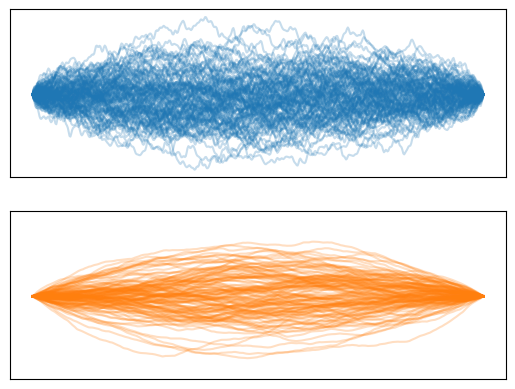

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
for ax in axes:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

for w, z in zip(ws, zs):
    axes[0].plot(x, w, color="tab:blue", alpha=0.25)
    axes[1].plot(x, z, color="tab:orange", alpha=0.25)

### The Feldman-Hájek theorem

Now consider two $X$-valued normal random variables $W$ and $Z$.
To simplify things, we'll assume that both of them have zero mean.
The plots above might suggest that these two stochastic processes behave differently in some essential way that we can quantify.
For example, the first process is a Brownian bridge.
A Brownian bridge is continuous with probability 1, but it is nowhere differentiable.
The second process, on the other hand, is almost surely differentiable.
We can be a little more formal about this and say that
$$\mathbb P[W \in H^1(\Omega)] = 0, \quad \mathbb P[Z \in H^1(\Omega)] = 1$$
where $H^1(\Omega)$ is the space of functions with square-integrable derivatives.
The two random variables are not mutually absolutely continuous.
That might not be too surprising.
We picked the eigenvalues distributions of each process to have different decay rates:
$$\sigma_n^2(W) \sim n^{-2}, \quad \sigma_n^2(Z) \sim n^{-2\gamma}.$$
Just to really hammer this point home, let's evaluate an approximation to the mean-square derivative of each group of samples.

In [6]:
δx = 1 / num_points

Dw = np.diff(ws, axis=1) / δx
energies_w = np.sum((Dw * Dw) * δx, axis=1)
print(f"∫|∇w|² dx = {energies_w.mean():.1f} ± {energies_w.std():.1f}")

Dz = np.diff(zs, axis=1) / δx
energies_z = np.sum((Dz * Dz) * δx, axis=1)
print(f"∫|∇z|² dx = {energies_z.mean():.1f} ± {energies_z.std():.1f}")

∫|∇w|² dx = 240.2 ± 21.5
∫|∇z|² dx = 3.8 ± 1.5


If you run this notebook with an even finer discretization of the unit interval, you'll see that $\int|\nabla w|^2\mathrm dx$ keeps increasing while the value of $\int|\nabla z|^2\mathrm dx$ stabilizes.

**What conditions guarantee that two function-value random variables are absolutely continuous?**
In other words, we want to know when it is impossible for there to be some subset $A$ of $X$ such that there is positive probability that $W$ is in $A$ but zero probability that $Z$ is in $A$ or vice versa.
What needs to be true about the covariance operators of the two random variables to fulfill this condition?
This is the content of the Feldman-Hájek theorem.

The calculation above suggests that two normal distributions will concentrate on different sets if the ratios $\sigma_n^2(W)/\sigma_n^2(Z)$ of the eigenvalues of their covariance operators can go to either zero or infinity.
The example above used two eigenvalue sequences that look like $n^{-\alpha}$ for different values of $\alpha$.
The gap in the decay rates then lets us construct a quadratic functional for which the process $Z$ takes finite values and $W$ takes infinite values.
The fact of this functional taking on finite or infinite values on one process or the other then implies the concentration of the two probability measures on different sets.
The fact that the mean square gradient of $W$ is infinite implies that $W$ is not differentiable with probability 1, while $Z$ is differentiable with probability 1.
Put another way, the probability distribution for $Z$ is concentrated in the set of differentiable functions while the probability distribution for $W$ is not.

We can always construct an operator like this when the decay rates differ, although the effect might be subtler.
For example, the distinction might be in having a higher-order derivative or not.

What if the ratio of the eigenvalue sequences doesn't go to zero or infinity?
Are the laws of the two processes equivalent, or can they still concentrate on different sets?
We can make it even simpler by supposing that $W \sim N(0, C)$ and $Z \sim N(0, \alpha C)$ for some non-zero $\alpha$.
We'll show that even these random variables concentrate on different sets.
I got this example from [MathOverflow](https://mathoverflow.net/questions/194322/equivalence-of-gaussian-measures/194375#194375).
Let $\{\sigma_n^2\}$ be the eigenvalues of $C$ (note the square) and $\{\psi_n\}$ the eigenfunctions.
Define the sequence of random variables
$$U_n = \langle \psi_n, W\rangle / \sigma_n.$$
We know from the KL expansion that the $U_n$ are independent, identically-distributed standard normal random variables.
If we also define
$$V_n = \langle\psi_n, Z\rangle / \sigma_n$$
then these random variables are i.i.d. normals with mean zero and variance $\alpha$.

Now remember that $W$ and $Z$ take values in a function space and so there are infinitely many modes to work with.
The strong law of large numbers then implies that
$$\frac{1}{n}\sum_nU_n^2 \to 1$$
with probability 1.
This would not be possible in a finite-dimensional vector space -- the sum would have to terminate at some $N$.
The average of $U_n^2$ would be a random variable with some non-trivial spread around its mean.
It can take on any positive value with non-zero probability.
That probability could be minute, but it is still positive.
Likewise, we also find that
$$\frac{1}{n}\sum_nV_n^2 \to \alpha$$
with probability 1.
But we've now shown that the two probability measures concentrate on different sets as long as $\alpha$ is not equal to 1.
The weighted average of squared expansion coefficients takes distinct values, each with probability 1, for the distributions of $W$ and $Z$.
So the two distributions are mutually singular.

Just to illustrate things a bit, the plot below shows samples obtained with a spectrum of $\{\sigma_n\}$ generated as before with $\gamma = 1.5$ and with $2\sigma_n$ respectively.

In [7]:
γ = 1.5
σs = np.sqrt(2) / (π * ns ** γ)
ws = np.stack([generate_sample(x, σs, rng) for k in range(num_samples)])
zs = np.stack([generate_sample(x, 2 * σs, rng) for k in range(num_samples)])

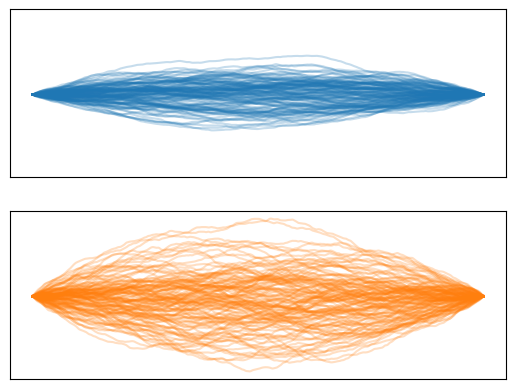

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
for ax in axes:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

for w, z in zip(ws, zs):
    axes[0].plot(x, w, color="tab:blue", alpha=0.25)
    axes[1].plot(x, z, color="tab:orange", alpha=0.25)

What this example shows is that it's not enough that $\sigma_n(W)$ and $\sigma_n(Z)$ have the same decay rate.
They both decay like some constant $\times$ $n^{-\gamma}$ for the same value of $\gamma$.
The two distributions are mutually singular even if the rates are the same but the constants are different.

At this point you might wonder if it's enough to have
$$\sigma_n(W)/\sigma_n(Z) \to 1.$$
Even this much tighter condition is not enough!

The **Feldman-Hájek theorem** states that, in order for $W$ and $Z$ to not concentrate on different sets, we need that
$$\sum_n\left(\frac{\sigma_n(W)}{\sigma_n(Z)} - 1\right)^2 < \infty.$$
Not only do we need that the eigenvalue ratio goes to 1, we need it to go to 1 fast enough to be summable.
For example, suppose we had a pair of $X$-valued random variables such that
$$\frac{\sigma_n(W)}{\sigma_n(Z)} - 1 \sim \frac{\text{const}}{\log n}.$$
The relative error between the two eigenvalue sequences is decreasing to zero.
But it isn't decreasing fast enough, so the two random variables would concentrate on different sets.

Why does this matter?
I stumbled on the Feldman-Hájek theorem while trying to understand two papers, [Beskos et al. (2008)](https://doi.org/10.1142/S0219493708002378) and [Cotter et al. (2013)](https://doi.org/10.1214/13-STS421).
Both of these papers are about how to do Markov-chain Monte Carlo sampling of probability distributions defined over function spaces.
The main ingredient of MCMC is a proposal mechanism, which generates a new candidate sample $z$ from the current sample $w$.
We can then also define a reverse proposal -- what is the probability of proposing $w$ if we instead started from $z$?
In order for an MCMC method to converge, [Tierney (1998)](https://www.jstor.org/stable/2667233) showed that the forward and reverse proposals need to be mutually absolutely continuous.
They cannot concentrate probability on different sets.
In finite dimensions, it's so hard to violate this condition that it often goes unstated.
In function spaces, on the other hand, you're almost guaranteed to violate it unless you're careful.
Even for the nicest class of distributions (normal random variables), the spectra of the covariance operators have to have nearly identical asymptotic behavior.
In light of that, it's not surprising that MCMC sampling in function spaces is so challenging.